In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

import utils
import methodprops
import plot_functions as fplot

import dsc
from dsc.query_engine import Query_Processor as dscQP
from dsc import dsc_io

import methodprops
plotmeta = methodprops.plot_metainfo()

In [2]:
resdir = "../dsc/results/"
plotdir = "boxplot_vs_cavi"

blockdiag_pkl = os.path.join(resdir, "linreg_blockdiag.pkl")
indep_pkl = os.path.join(resdir, "linreg_indep.pkl")

blockdiag_df = pd.read_pickle(blockdiag_pkl)
indep_df     = pd.read_pickle(indep_pkl)

sparse_blockdiag_df = blockdiag_df[blockdiag_df['simulate.sfix'] != 250]
sparse_indep_df     = indep_df[indep_df['simulate.sfix'] != 250]

primary_keys = ['simulate', 'simulate.dims', 'simulate.sfix', 'simulate.pve']
secondary_keys = ['DSC']
unique_keys = ['simulate.sfix', 'simulate.pve']

reference = 'mr_ash_lasso_init'
targets = ['mr_ash', 'mr_ash_lasso_init', 
           'gradvi_compound', 'gradvi_direct', 'gradvi_compound_lasso_init', 'gradvi_direct_lasso_init']

df = utils.pivot_simulation_stat(sparse_blockdiag_df, 'elbo',
        primary_keys = primary_keys,
        secondary_keys = secondary_keys,
        unique_keys = unique_keys)

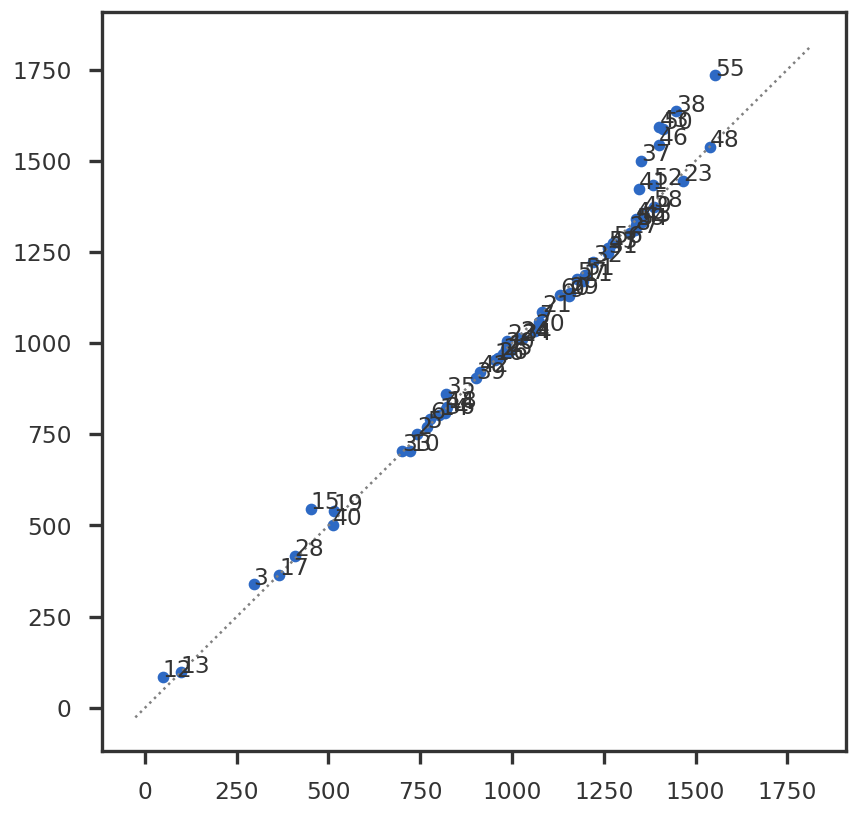

In [5]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 120)

fig = plt.figure()
ax1 = fig.add_subplot(111)

method1 = 'mr_ash_lasso_init'
method2 = 'gradvi_compound'

ax1.scatter(df[method1], df[method2])

for k, v in df[[method1, method2]].iterrows():
    ax1.annotate(k, v)


mpl_utils.plot_diag(ax1)
plt.show()

In [11]:
idsc = 357

In [14]:
sparse_blockdiag_df

,simulate,simulate.dims,simulate.sfix,simulate.pve,fit,DSC,mse,coef_mse,niter,elbo,runtime_wall,runtime_cpu,runtime_dsc,convergence
0,blockdiag,"(500,10000)",5,0.6,mr_ash,1,3.125881,0.001191,82,996.923588,5.781000,5.635000,5.803000,1
1,blockdiag,"(500,10000)",5,0.6,mr_ash,2,1.195821,0.000508,83,789.008858,6.425000,6.180000,6.448000,1
2,blockdiag,"(500,10000)",5,0.6,mr_ash,3,0.194262,0.000090,87,353.585227,6.823000,6.621000,6.844000,1
3,blockdiag,"(500,10000)",5,0.6,mr_ash,4,9.630912,0.000679,137,1340.494262,9.208000,9.049000,9.229000,1
4,blockdiag,"(500,10000)",5,0.6,mr_ash,5,1.336688,0.000317,96,791.146657,7.234000,7.064000,7.255000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,blockdiag,"(500,10000)",20,0.6,gradvi_compound_lasso_init,16,8.566735,0.000992,71,1293.028610,23.654614,92.192354,23.655588,1
356,blockdiag,"(500,10000)",20,0.6,gradvi_compound_lasso_init,17,5.077626,0.001157,74,1172.797407,31.388155,77.585006,31.388695,1
357,blockdiag,"(500,10000)",20,0.6,gradvi_compound_lasso_init,18,12.322059,0.001359,90,1390.088854,29.559784,96.223161,29.560382,1
358,blockdiag,"(500,10000)",20,0.6,gradvi_compound_lasso_init,19,13.658426,0.005979,202,1416.725449,70.241684,195.525791,70.242445,1


In [15]:
plotdf = utils.stratify_dfcols(sparse_blockdiag_df, 
                     [('simulate.sfix', 20), 
                      ('DSC', 1)])

,simulate,simulate.dims,simulate.sfix,simulate.pve,fit,DSC,mse,coef_mse,niter,elbo,runtime_wall,runtime_cpu,runtime_dsc,convergence
240,blockdiag,"(500,10000)",20,0.6,mr_ash,1,11.993973,0.003141,173,1342.502471,11.340000,11.181000,11.365000,1
260,blockdiag,"(500,10000)",20,0.6,mr_ash_lasso_init,1,11.543715,0.002387,120,1345.185592,16.393000,12.093000,16.432000,1
280,blockdiag,"(500,10000)",20,0.6,gradvi_direct,1,11.543962,0.002387,216,1345.317945,138.315510,280.203323,138.316360,1
300,blockdiag,"(500,10000)",20,0.6,gradvi_compound,1,13.684114,0.003790,32,1423.018765,11.670297,48.863215,11.680291,1
320,blockdiag,"(500,10000)",20,0.6,gradvi_direct_lasso_init,1,11.759545,0.002723,296,1334.215196,211.188099,406.541291,211.189163,1
340,blockdiag,"(500,10000)",20,0.6,gradvi_compound_lasso_init,1,11.630659,0.002643,84,1338.778116,55.035914,137.571665,55.037117,1


In [7]:
idsc = 

,simulate,simulate.dims,simulate.sfix,simulate.pve,fit,DSC,mse,coef_mse,niter,elbo,runtime_wall,runtime_cpu,runtime_dsc,convergence


In [30]:
dsc_output = "/gpfs/commons/groups/knowles_lab/sbanerjee/sparse-regression/gradvi-experiments/linreg_indep"
#dsc_output = "/gpfs/commons/groups/knowles_lab/sbanerjee/sparse-regression/gradvi-experiments/linreg_blockdiag"
#dsc_output = "/gpfs/commons/groups/knowles_lab/sbanerjee/sparse-regression/gradvi-experiments/trendfiltering"

dsc_fname  = os.path.basename(os.path.normpath(dsc_output))
db = os.path.join(dsc_output, dsc_fname + ".db")
is_trendfiltering = False

if is_trendfiltering:
    target = ["simulate", "simulate.sfix", "simulate.snr", "simulate.n", "simulate.dtrue", "fit"]
else:
    target = ["simulate", "simulate.sfix", "simulate.pve",   "simulate.se", "simulate.dims", "fit"]

#condition = ["simulate.sfix == 2", "simulate.signal == 'normal'", "simulate.dims == '(50, 200)'"]
#groups = ["fit_cpt:"]
condition = [""]

print ("Reading from DSC database:")
print (f"    {db}")
print ("")

qp = dscQP(db, target, condition)
qpdf = qp.output_table
qpdf = utils.stratify_dfcols(qpdf, 
                     [('simulate.sfix', 20), 
                      ('DSC', 1)])

Reading from DSC database:
    /gpfs/commons/groups/knowles_lab/sbanerjee/sparse-regression/gradvi-experiments/linreg_indep/linreg_indep.db



In [31]:
qpdf

,DSC,simulate,simulate.sfix,simulate.se:output,simulate.pve,simulate.output.file,simulate.dims,fit,fit.output.file
2,1,equicorrgauss,20,equicorrgauss/equicorrgauss_7,0.6,equicorrgauss/equicorrgauss_7,"(500,10000)",mr_ash,mr_ash/equicorrgauss_7_mr_ash_1
82,1,equicorrgauss,20,equicorrgauss/equicorrgauss_7,0.6,equicorrgauss/equicorrgauss_7,"(500,10000)",mr_ash_lasso_init,mr_ash_lasso_init/equicorrgauss_7_lasso_1_mr_a...
162,1,equicorrgauss,20,equicorrgauss/equicorrgauss_7,0.6,equicorrgauss/equicorrgauss_7,"(500,10000)",gradvi_direct,gradvi_direct/equicorrgauss_7_gradvi_direct_1
242,1,equicorrgauss,20,equicorrgauss/equicorrgauss_7,0.6,equicorrgauss/equicorrgauss_7,"(500,10000)",gradvi_compound,gradvi_compound/equicorrgauss_7_gradvi_compound_1
322,1,equicorrgauss,20,equicorrgauss/equicorrgauss_7,0.6,equicorrgauss/equicorrgauss_7,"(500,10000)",gradvi_direct_lasso_init,gradvi_direct_lasso_init/equicorrgauss_7_lasso...
402,1,equicorrgauss,20,equicorrgauss/equicorrgauss_7,0.6,equicorrgauss/equicorrgauss_7,"(500,10000)",gradvi_compound_lasso_init,gradvi_compound_lasso_init/equicorrgauss_7_las...


In [32]:
def get_output_filename_from_db(outdir, row):
    method = row['fit'].values[0]
    fprefix = row['fit.output.file'].values[0]
    ext = 'pkl' if method.startswith('gradvi') else 'rds'
    fname = os.path.join(outdir, f"{fprefix}.{ext}")
    return fname

def read_output_file(outdir, db, method):
    dfrow = utils.stratify_dfcol(db, 'fit', method)
    '''
    must be a single row after selection
    '''
    assert(dfrow.shape[0] == 1)
    fname = get_output_filename_from_db(outdir, dfrow)
    data  = dsc_io.load_dsc(fname)
    return data

def get_elbo_path(data):
    if 'fit' in data['model'].keys():
        return data['model']['fit']['varobj']
    else:
        return data['model']['elbo_path']

In [33]:
fname = os.path.join(dsc_output, f"{qpdf.iloc[0,]['simulate.output.file']}.pkl")
simdata = dsc_io.load_dsc(fname)

elbo_path = dict()
#ypred = dict()
for method in targets:
    data = read_output_file(dsc_output, qpdf, method)
    #ypred[method] = data['ypred']
    elbo_path[method] = get_elbo_path(data)

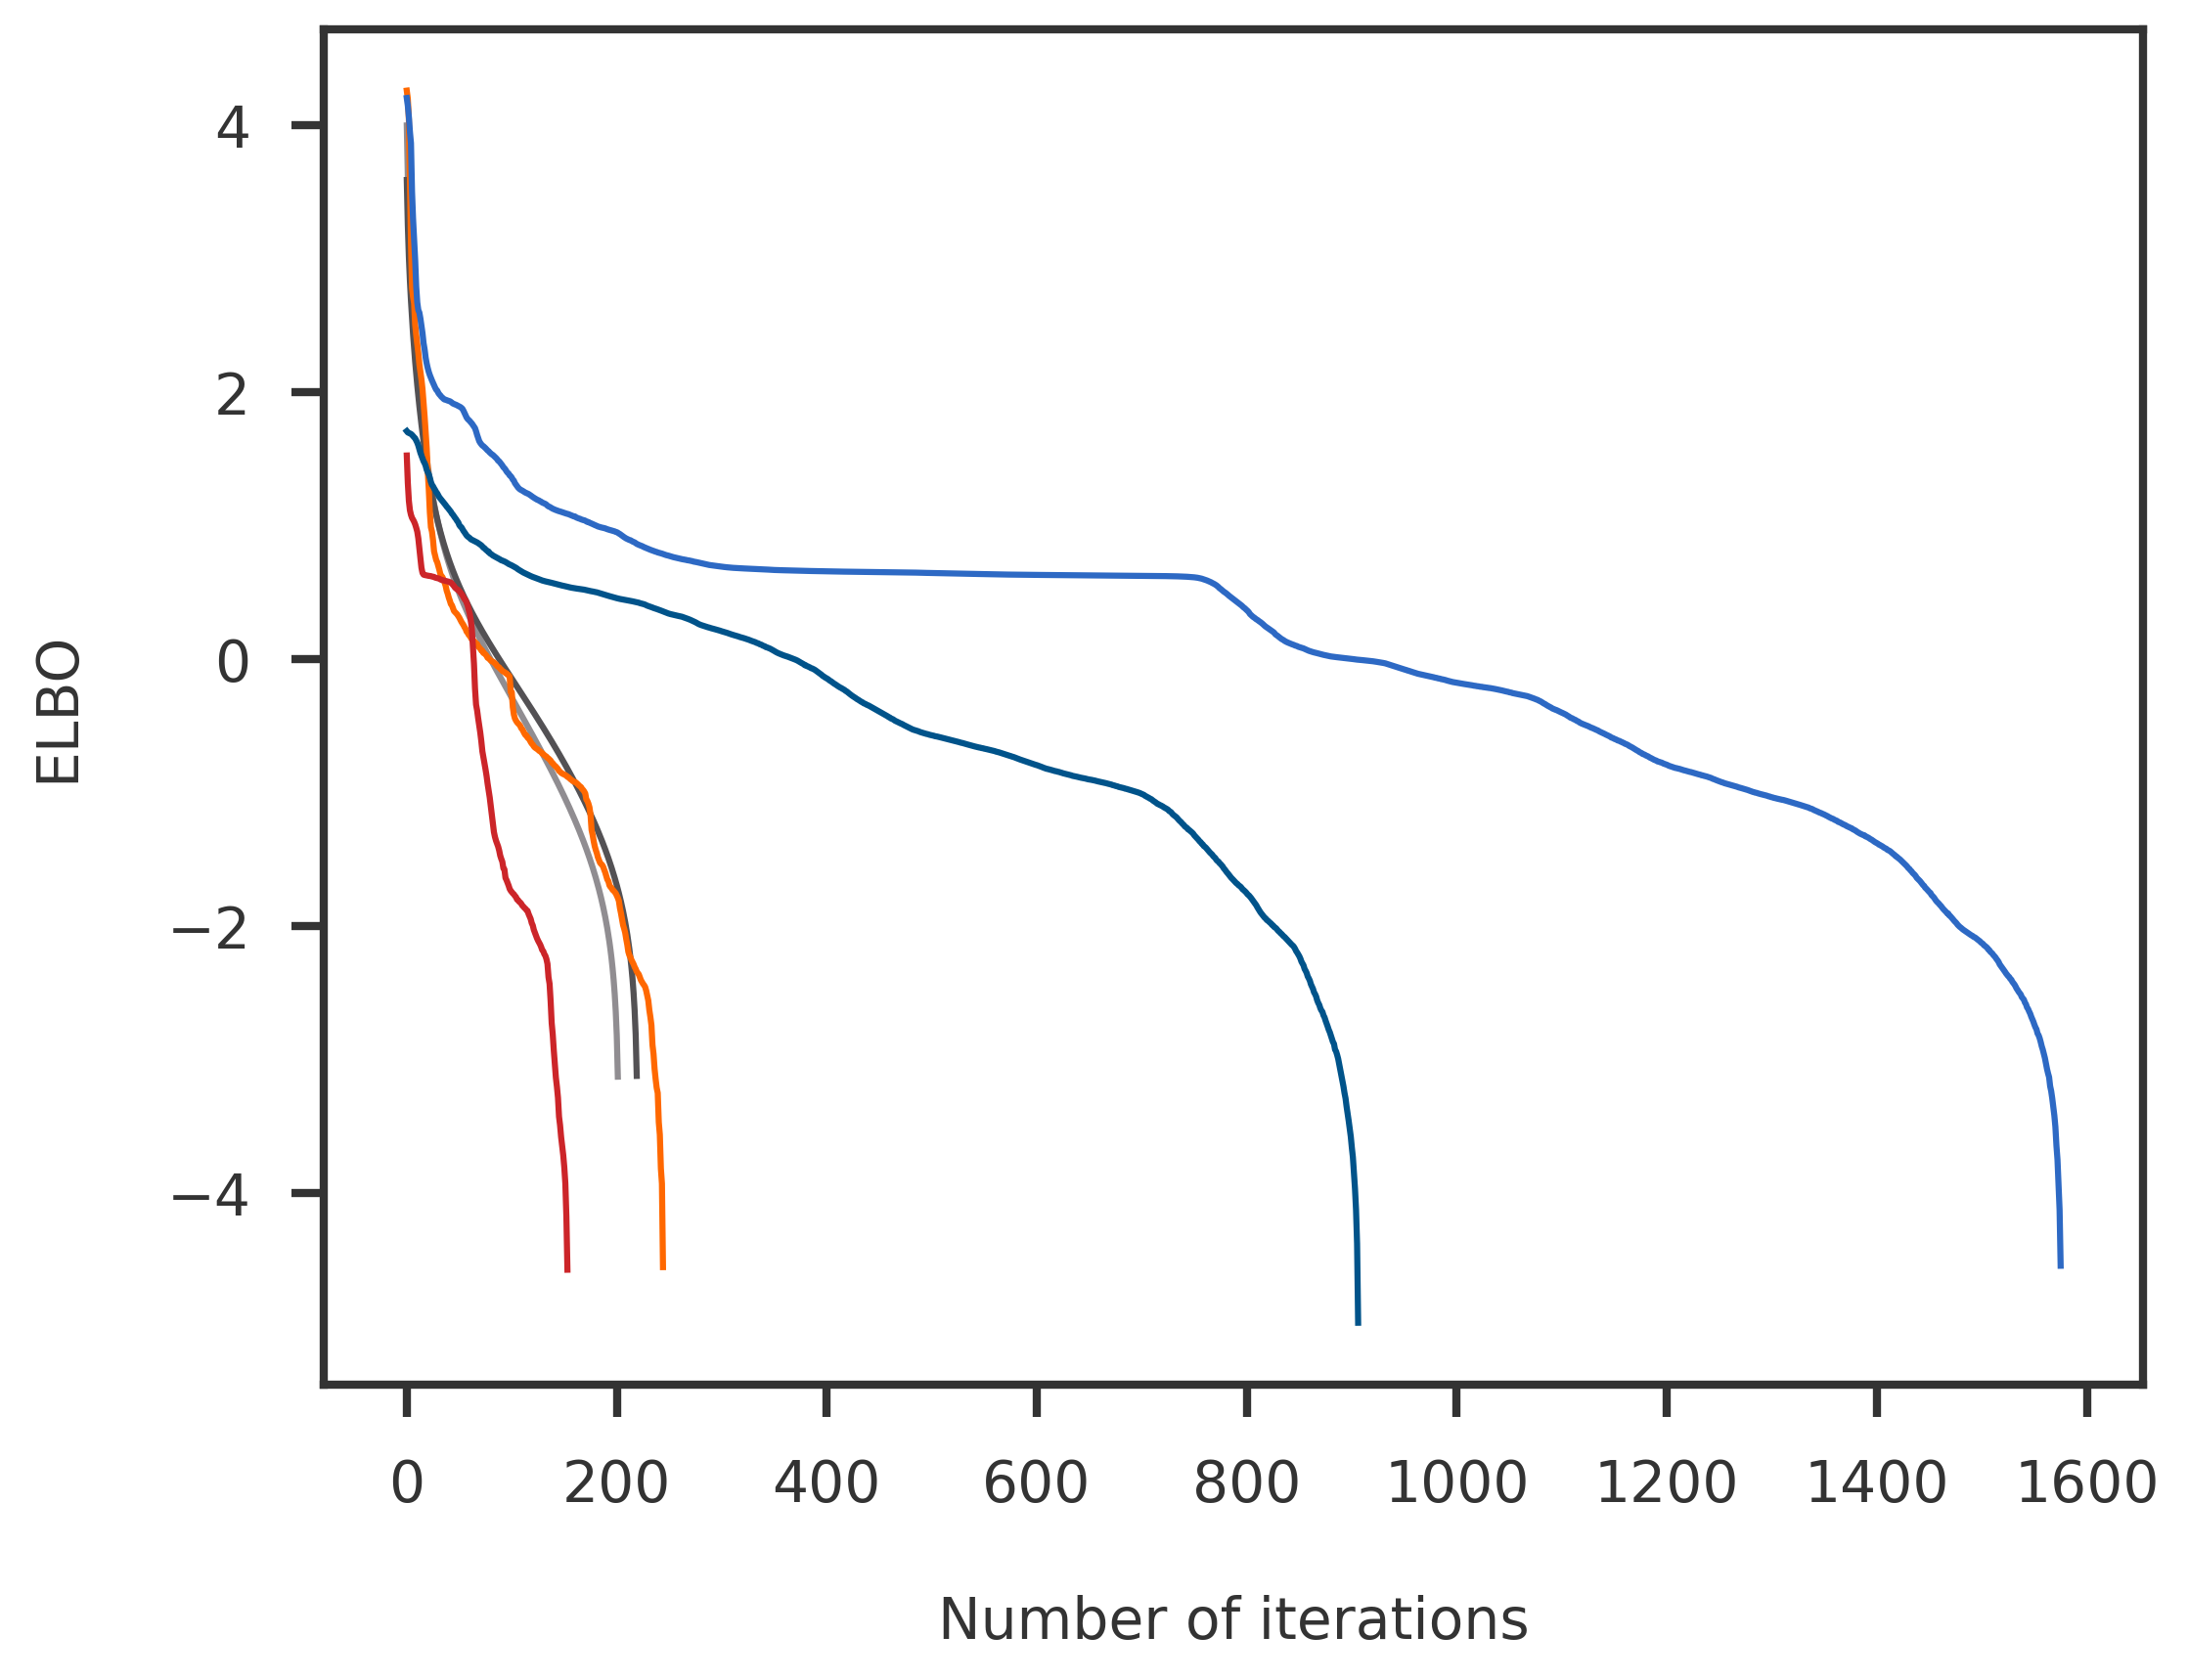

In [34]:
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

fig = plt.figure(figsize = (8, 6))
ax1 = fig.add_subplot(111)

for method in targets:
    ev = elbo_path[method]
    evdiff = ev[:-1] - ev[-1]
    evdiff[evdiff == 0] = np.min(evdiff[evdiff != 0])
    logev = np.log10(evdiff)
    ax1.plot(np.arange(logev.shape[0]), logev, color = plotmeta[method].color)
    
ax1.set_xlabel("Number of iterations")
ax1.set_ylabel("ELBO")


utils.saveplot(fig, f"indep_elbo_example")

plt.show()

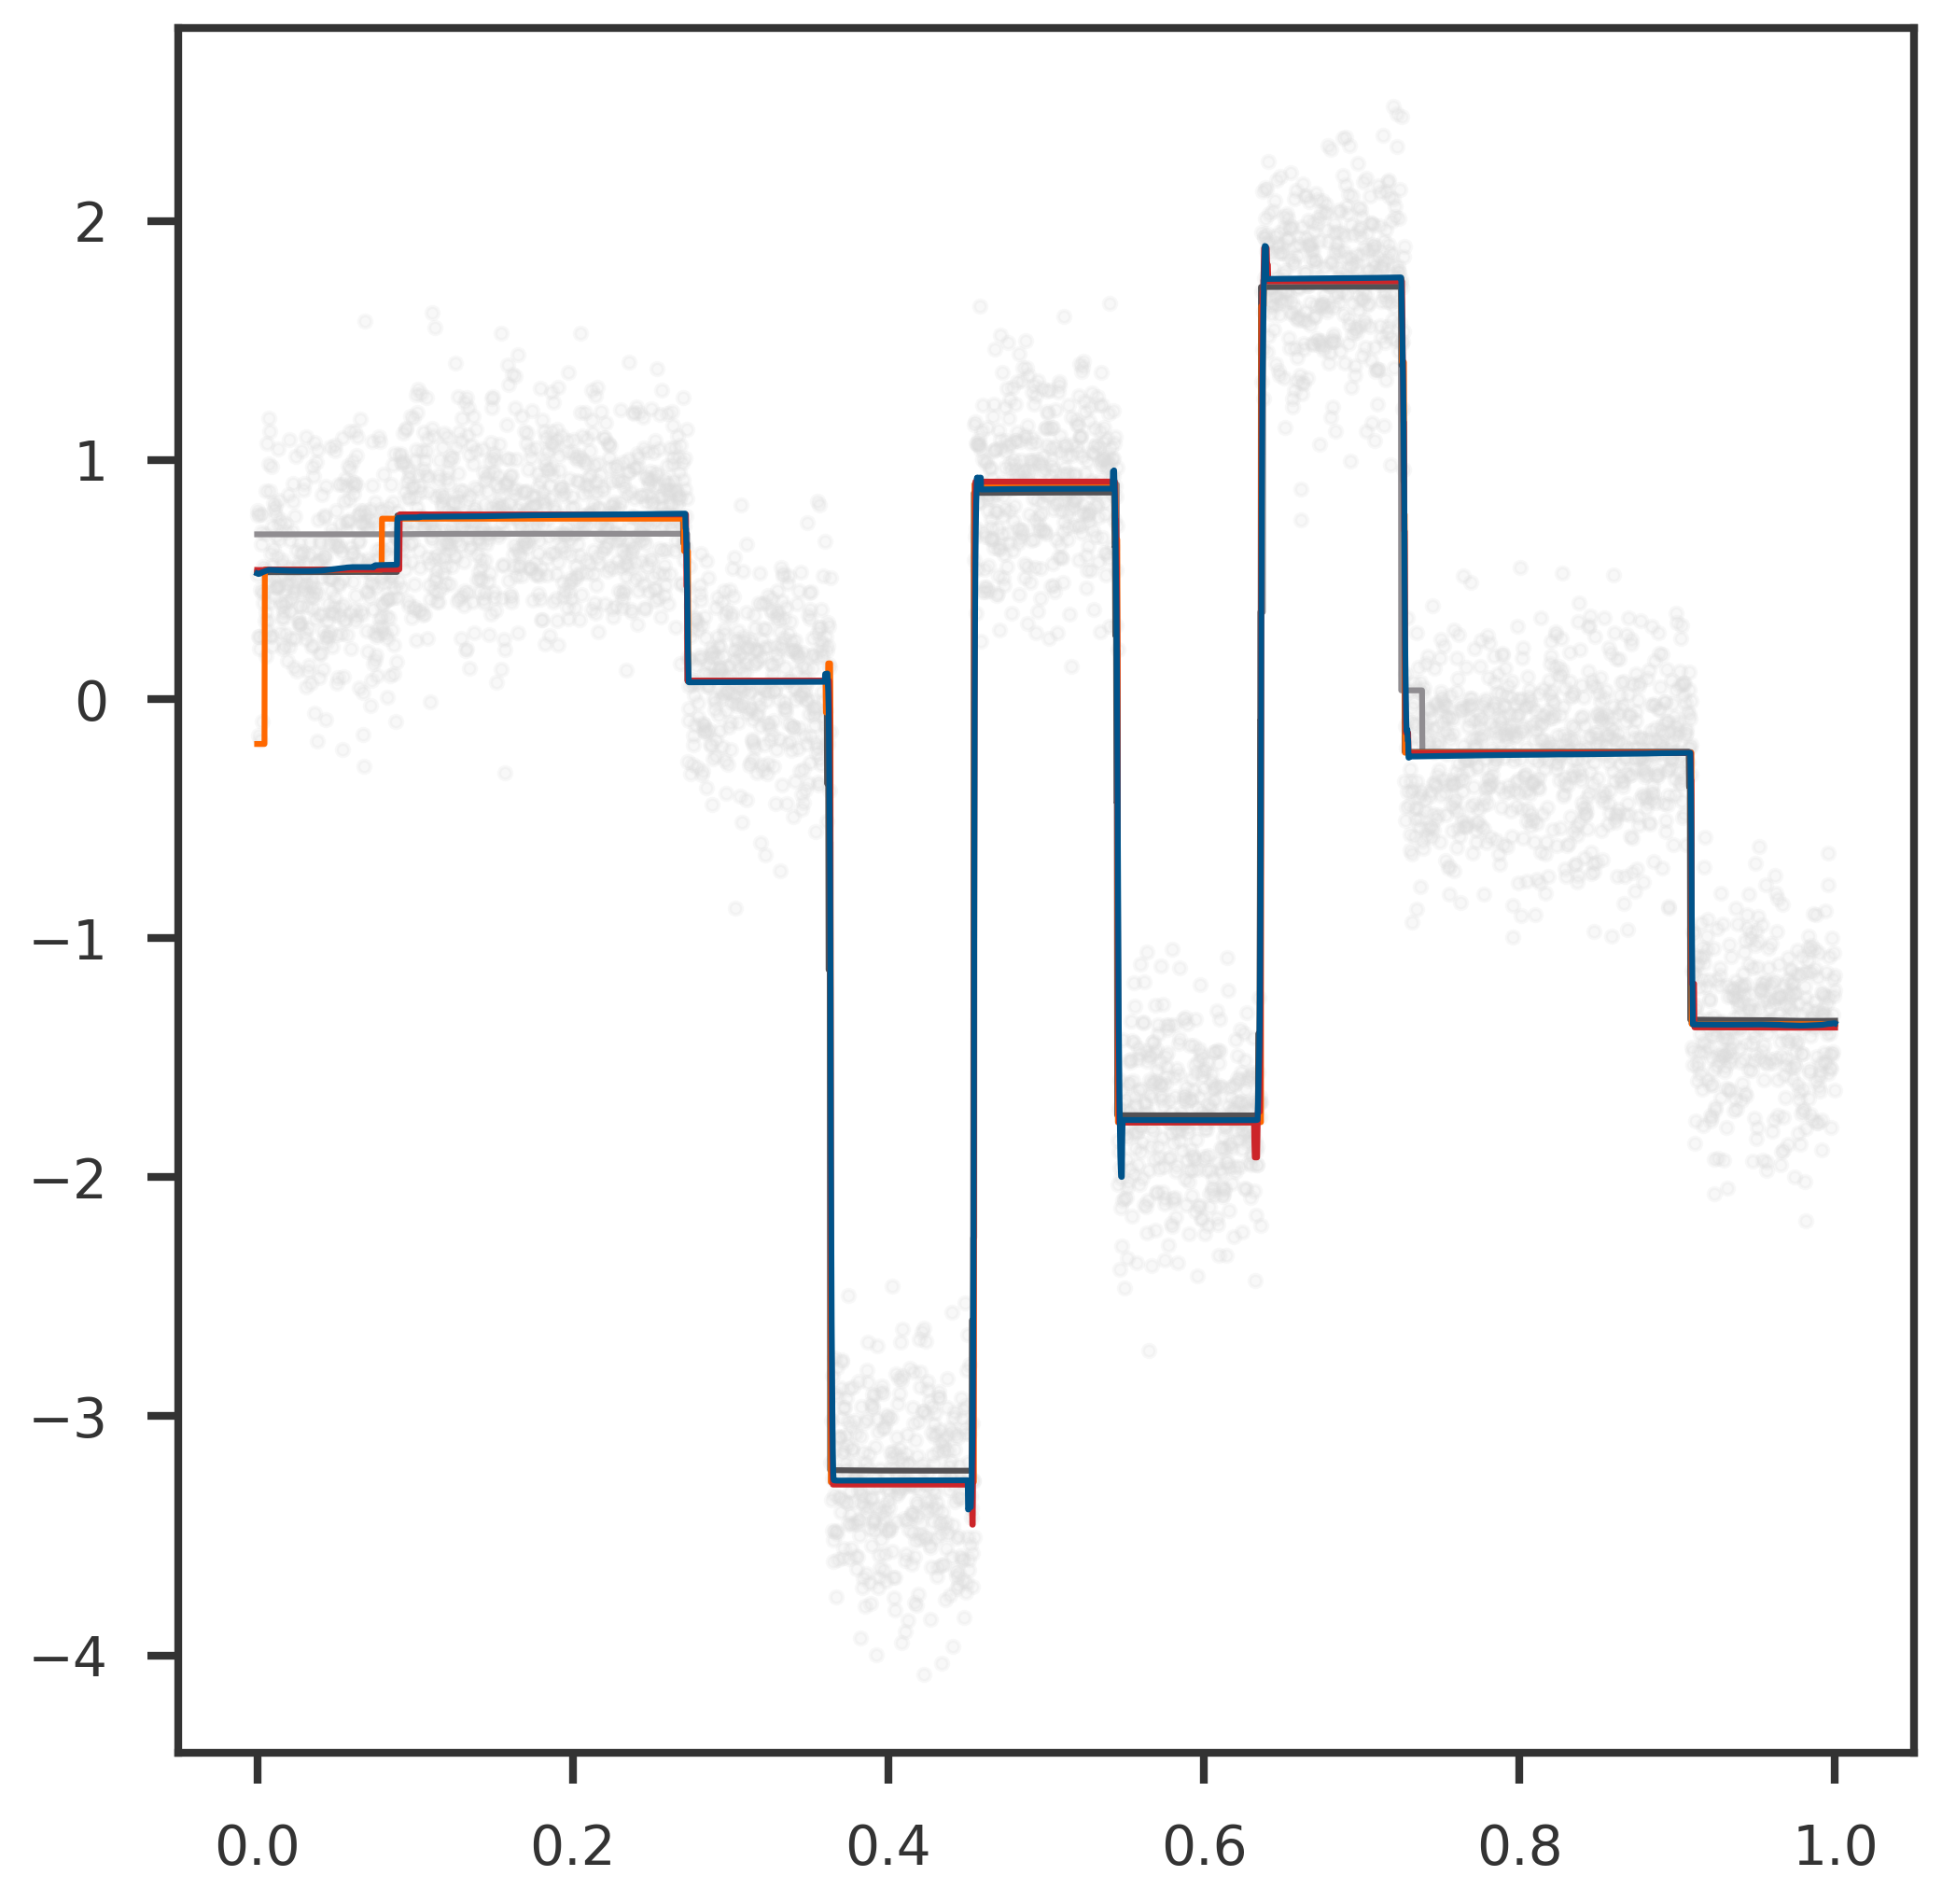

In [77]:
import methodprops
plotmeta = methodprops.plot_metainfo()

fig = plt.figure()
ax1 = fig.add_subplot(111)

n = simdata['y'].shape[0]
x = np.linspace(0, 1, n)
ax1.scatter(x, simdata['y'], color = 'gainsboro', s = 10, alpha = 0.2)
for method in targets:
    ax1.plot(x, ypred[method], c = plotmeta[method].color)
    
plt.show()

In [39]:
data['model']['fit']['varobj']

array([6037.08640135, 5602.78849026, 5286.5865039 , ..., 1167.64009542,
       1167.62913067, 1167.61818569])

In [43]:
data['model']['elbo_path']

array([6708.36275662, 6557.46028037, 6172.34741427, ..., -541.85537629,
       -541.85557445, -541.85571436])